In [1]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
def get(data,index):
    l = []
    for d in data:
        l.append(d[index])
    return l

def normalize(vs):
    minb = min(B)
    maxb = max(B)
    l = []
    for v in vs:
        l.append((v-minb)/(maxb-minb))
    return np.array(l)
import json

def load(filepath):
    with open(filepath,'r') as fh:
        obj = json.loads(fh.read())
    dataset = {}
    for idx,cat in enumerate(obj['groups']['values']):
        key = str(cat)
        if not key in dataset:
            dataset[key] = {"X":[],"D":[],"B":[],"N":[]}
    
        pars = dict(zip(obj['params']['fields'], \
                           obj['params']['values'][idx]))
        expect = dict(zip(obj['expected']['fields'], \
                        obj['expected']['values'][idx]))
        meas = dict(zip(obj['observed']['fields'], \
                        obj['observed']['values'][idx]))
        
        dataset[key]['X'].append(list(pars.values()))
        dataset[key]['D'].append(expect['output'])
        dataset[key]['B'].append(meas['bias'])
        dataset[key]['N'].append(meas['noise'])
        print(meas['bias'],expect['output'])
    return dataset


In [3]:
filepath = "../../outputs/datasets/integ_0_3_0_0.json"
dataset = load(filepath)

(0.0008862304384820163, 0.0)
(0.005478515289723873, 0.0)
(-0.0019239187240600586, -1.0)
(0.0002416992065263912, 0.0)
(0.006364745553582907, 0.0)
(-0.005478799343109131, -0.9411764740943909)
(-0.0010473632719367743, 0.0)
(0.005881347693502903, 0.0)
(0.0004731416702270508, -0.8823529481887817)
(-0.0006445312174037099, 0.0)
(0.006606445647776127, 0.0)
(-0.0029207468032836914, -0.8235294222831726)
(-0.0010473632719367743, 0.0)
(0.006525879260152578, 0.0)
(0.003756225109100342, -0.7647058963775635)
(-1.7462298967929613e-11, 0.0)
(0.007250976748764515, 0.0)
(-0.0047133564949035645, -0.7058823704719543)
(0.0009667968261055648, 0.0)
(0.006606445647776127, 0.0)
(0.00027179718017578125, -0.6470588445663452)
(-0.0010473632719367743, 0.0)
(0.005397949367761612, 0.0)
(-0.0033638477325439453, -0.5882353186607361)
(-5.8207661780829145e-12, 0.0)
(0.005720214918255806, 0.0)
(0.003152012825012207, -0.529411792755127)
(-0.00024169923563022166, 0.0)
(0.006687011569738388, 0.0)
(-0.0041089653968811035, -0.

In [9]:
k = list(dataset.keys())[1]
print(k)
X = dataset[k]['X']
D = dataset[k]['D']
B = dataset[k]['B']
n = len(B)
print("num els=%d" % n)

[u'pos', u'pos', u'medium', u'medium', u'out0']
num els=36


[u'pos', u'pos', u'medium', u'medium', u'in0']


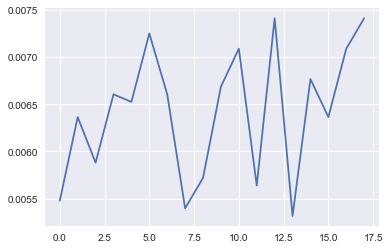

In [11]:
k2 = list(dataset.keys())[0]
print(k2)
B_in = dataset[k2]['B']
plt.plot(B_in)

In [22]:
#targ = np.array(list(map(lambda i: D[i], range(n))))
targ = np.array(list(map(lambda i: D[i], range(n))))
bias = np.array(B)
meas = np.array(list(map(lambda i: B[i]+targ[i], range(n))))
print("targ: [%f,%f]" % (min(targ),max(targ)))
print("bias: [%f,%f]" % (min(bias),max(bias)))
print("meas: [%f,%f]" % (min(meas),max(meas)))

targ: [-1.000000,0.000000]
bias: [-0.005479,0.003756]
meas: [-1.001924,0.001611]


In [23]:
def nonlin_fit(xdata,a,b):
    x = xdata
    result = (a)*(x) + b
    return result

In [28]:
(a,b),corrs = scipy.optimize.curve_fit(nonlin_fit, targ, meas)
print(a,b)

(1.0023299590731793, 0.00020448440319942307)


In [29]:
def predict(v):
    return a*v + b

In [32]:
pred = list(map(lambda i: predict(targ[i]), range(n)))

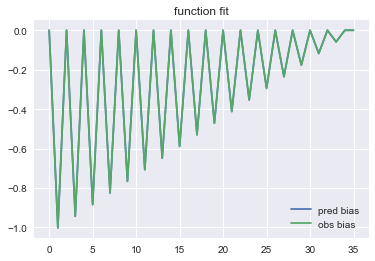

In [35]:
plt.plot(pred,label='pred bias')
plt.plot(targ,label='obs bias')
plt.title("function fit")
plt.legend()

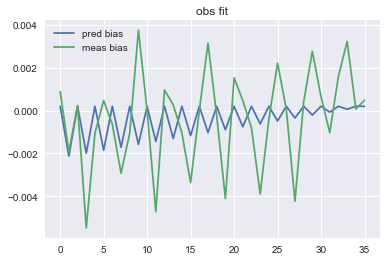

In [36]:
plt.plot(pred-targ,label='pred bias')
plt.plot(bias,label='meas bias')
plt.title("obs fit")
plt.legend()

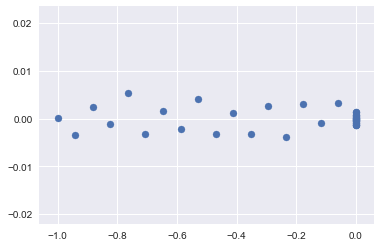

In [40]:
corr_bias = bias - (pred-targ)
plt.scatter(targ,corr_bias)